In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings; warnings.simplefilter('ignore')

In [2]:
df_forest = pd.read_csv("/content/forestfires (1).csv")
df_forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
print ("The shape of the dataset : ", df_forest.shape)

The shape of the dataset :  (517, 13)


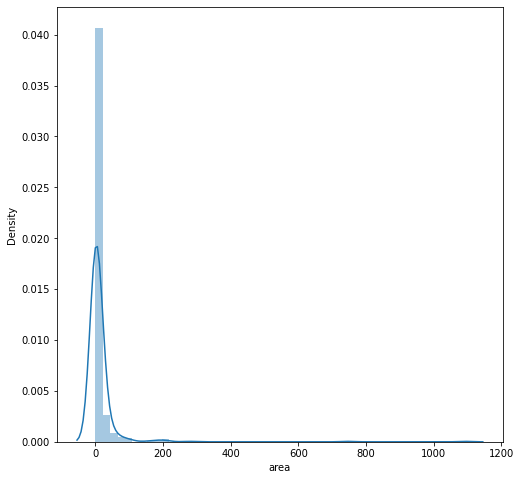

In [4]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.distplot(df_forest['area']);

In [5]:
df_forest['u_area'] = np.log(df_forest['area'] + 1)

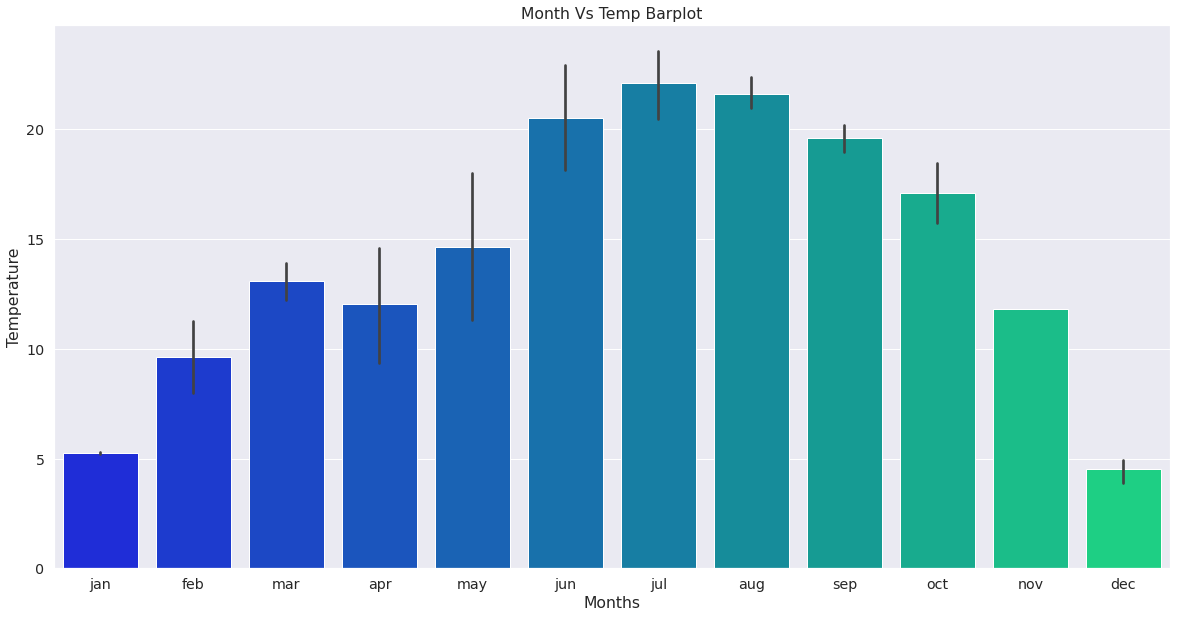

In [6]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = df_forest,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

In [7]:
df_forest.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

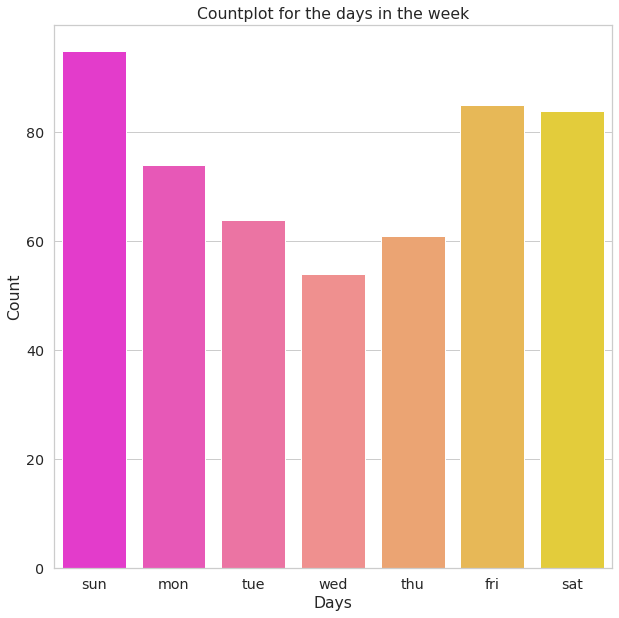

In [8]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(df_forest['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'spring')
day.set(title = 'Countplot for the days in the week', xlabel = 'Days', ylabel = 'Count');

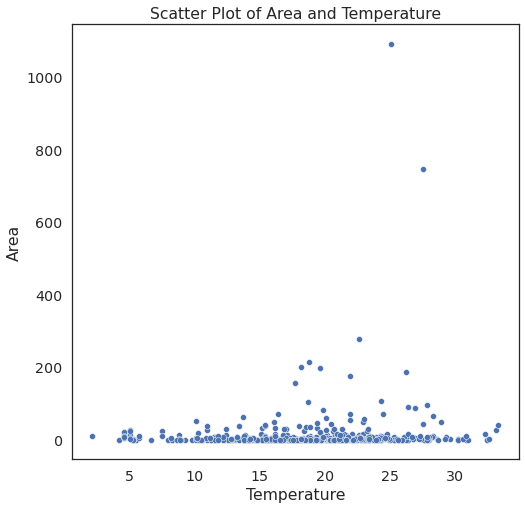

In [9]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set(style = "white", font_scale = 1.3)
scat = sns.scatterplot(df_forest['temp'], df_forest['area'])
scat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Area");

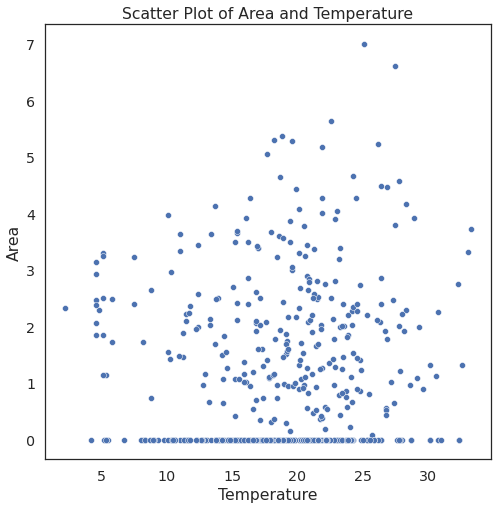

In [10]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set(style = "white", font_scale = 1.3)
scat = sns.scatterplot(df_forest['temp'], df_forest['u_area'])
scat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Area");

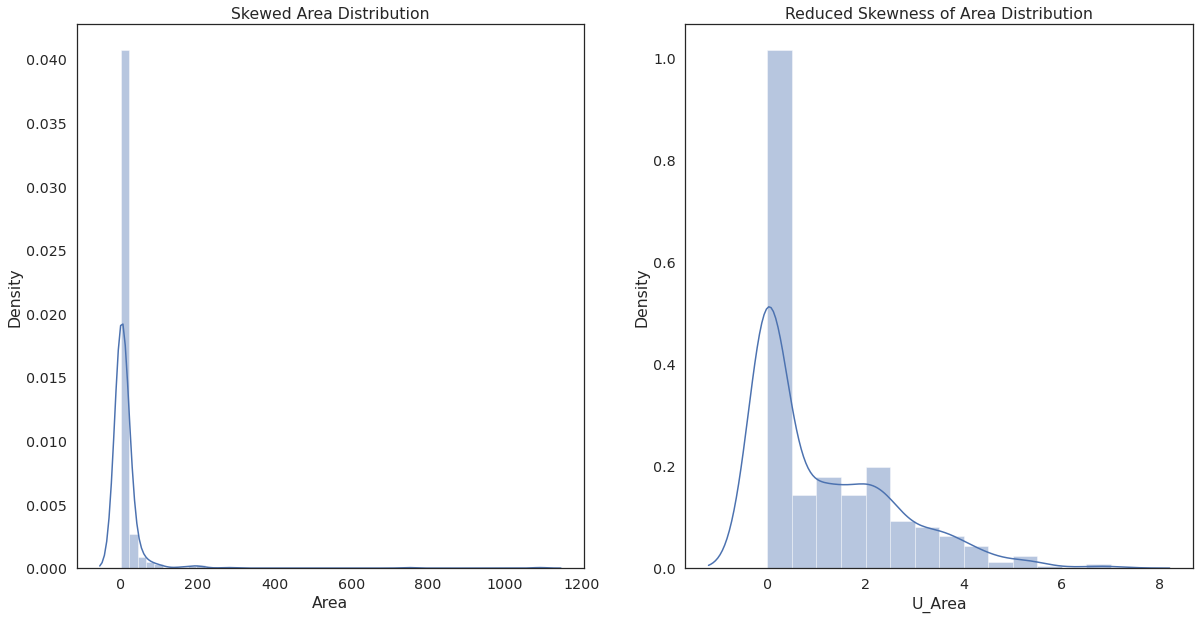

In [11]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = 'white', font_scale = 1.3)
fig, ax = plt.subplots(1,2)

# Distribution Plots
area_dist = sns.distplot(df_forest['area'], ax = ax[0]);
area_dist_2 = sns.distplot(df_forest['u_area'], ax = ax[1]);
area_dist.set(title = "Skewed Area Distribution", xlabel = "Area", ylabel = "Density")
area_dist_2.set(title = "Reduced Skewness of Area Distribution", xlabel = "U_Area", ylabel = "Density");

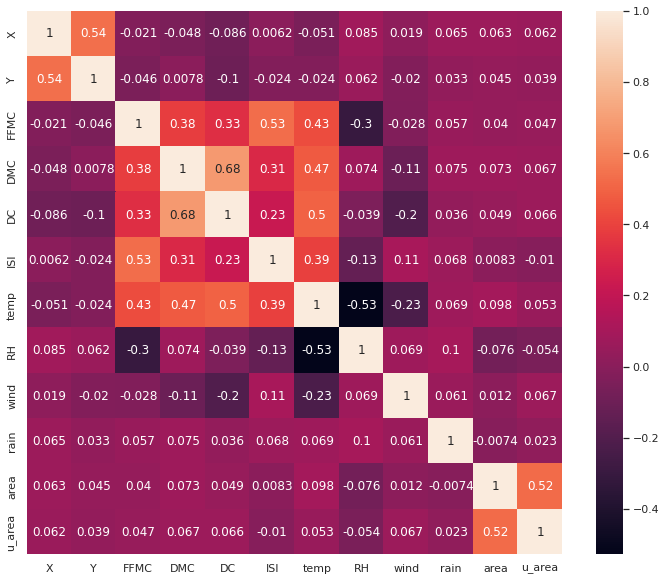

In [12]:
plt.rcParams['figure.figsize'] = [12, 10]
sns.set(font_scale = 1)
sns.heatmap(df_forest.corr(), annot = True);

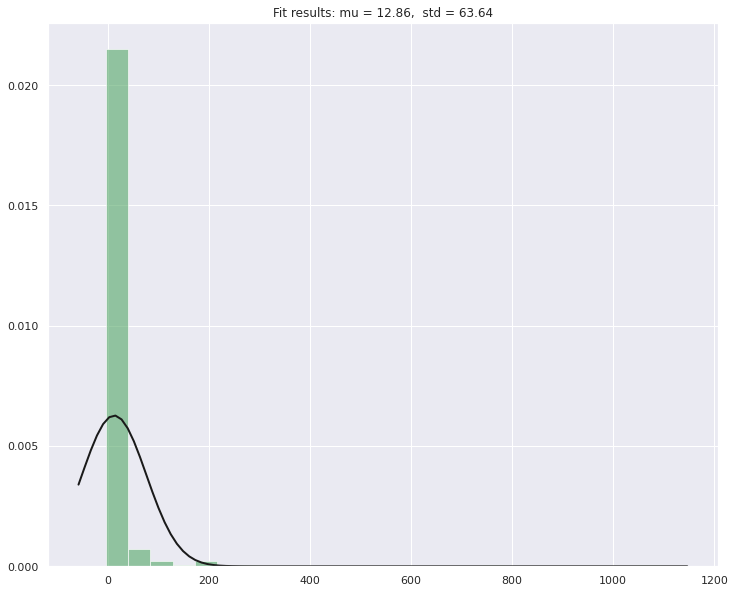

In [13]:
data = norm.rvs(df_forest['area'])

# Fit a normal distribution to the data
mu, std = norm.fit(data)

plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [14]:
df_forest['area'] = np.log(df_forest['area'] + 1)
df_forest.drop(columns = 'u_area', inplace = True)

display(df_forest)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


In [15]:
minmax = MinMaxScaler()

# FFMC, DMC, DC, ISI, RH
df_forest['FFMC'] = minmax.fit_transform(np.array(df_forest['FFMC']).reshape(-1, 1))
df_forest['DMC'] = minmax.fit_transform(np.array(df_forest['DMC']).reshape(-1, 1))
df_forest['DC'] = minmax.fit_transform(np.array(df_forest['DC']).reshape(-1, 1))
df_forest['ISI'] = minmax.fit_transform(np.array(df_forest['ISI']).reshape(-1, 1))
df_forest['RH'] = minmax.fit_transform(np.array(df_forest['RH']).reshape(-1, 1))

In [16]:
df_forest['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [17]:
df_forest.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,0.928318,0.378264,0.633329,0.160814,18.889168,0.344567,4.017602,0.021663,1.111026
std,2.313778,1.229900,0.071227,0.220698,0.290918,0.081274,5.806625,0.191970,1.791653,0.295959,1.398436
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.200000,0.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,0.922581,0.232598,0.504046,0.115865,15.500000,0.211765,2.700000,0.000000,0.000000
50%,4.000000,4.000000,0.940645,0.369400,0.769673,0.149733,19.300000,0.317647,4.000000,0.000000,0.418710
75%,7.000000,5.000000,0.957419,0.486906,0.827958,0.192513,22.800000,0.447059,4.900000,0.000000,2.024193
max,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,33.300000,1.000000,9.400000,6.400000,6.995620


In [18]:
df_forest['month'].replace({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
                           'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12},
                           inplace = True)

# Days
df_forest['day'].replace({'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6, 'sat' : 7}, inplace = True)

# # Using Label Encoder for cat to num conversion
# categorical = list(df_forest.select_dtypes(include = ["object"]).columns)
# for i, column in enumerate(categorical) :
#     label = LabelEncoder()
#     df_forest[column] = label.fit_transform(df_forest[column])

df_forest.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,0.870968,0.086492,0.101325,0.090909,8.2,0.423529,6.7,0.0,0.0
1,7,4,10,3,0.927742,0.118194,0.775419,0.119430,18.0,0.211765,0.9,0.0,0.0
2,7,4,10,7,0.927742,0.146795,0.796294,0.119430,14.6,0.211765,1.3,0.0,0.0
3,8,6,3,6,0.941935,0.110958,0.081623,0.160428,8.3,0.964706,4.0,0.2,0.0
4,8,6,3,1,0.910968,0.172984,0.110590,0.171123,11.4,0.988235,1.8,0.0,0.0
5,8,6,8,1,0.949677,0.290145,0.563035,0.262032,22.2,0.164706,5.4,0.0,0.0
6,8,6,8,2,0.949677,0.302550,0.571948,0.151515,24.1,0.141176,3.1,0.0,0.0
7,8,6,8,2,0.939355,0.497243,0.703999,0.190731,8.0,0.835294,2.2,0.0,0.0
8,8,6,9,3,0.932903,0.442453,0.802979,0.124777,13.1,0.564706,5.4,0.0,0.0
9,7,5,9,7,0.952258,0.299449,0.810015,0.126560,22.8,0.294118,4.0,0.0,0.0


In [19]:
target = df_forest['area']
features = df_forest.drop(columns = 'area')

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.15, random_state = 196)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (439, 12)
Test data set size :  (78, 12)


In [20]:
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
344,6,3,9,2,0.939355,0.444521,0.937258,0.133690,12.2,0.600000,4.9,0.0
6,8,6,8,2,0.949677,0.302550,0.571948,0.151515,24.1,0.141176,3.1,0.0
485,2,4,8,2,0.984516,0.463129,0.690043,0.379679,30.6,0.152941,3.6,0.0
419,2,5,8,1,0.940645,0.620951,0.709628,0.135472,24.8,0.247059,4.0,0.0
263,6,3,8,6,0.934194,0.482426,0.728509,0.126560,19.3,0.282353,3.6,0.0


In [21]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, predictions))
print ("r2 Score : ", r2_score(y_test, predictions))

Mean Squared Error :  1.6721913684845617
r2 Score :  -0.002195214621955932


In [22]:
poly = PolynomialFeatures(4)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

model_2 = LinearRegression()
model_2.fit(poly_X_train, y_train)

# Predictions
predictions_poly = model_2.predict(poly_X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, predictions_poly))
print ("r2 Score : ", r2_score(y_test, predictions_poly))

Mean Squared Error :  421.21960520560737
r2 Score :  -251.4497378697638


In [23]:
model_3 = Lasso(alpha = 100, max_iter = 10000) 
model_3.fit(X_train, y_train)

# Predictions
prediction = model_3.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, prediction))
print ("r2 Score : ", r2_score(y_test, prediction))

Mean Squared Error :  1.6692539081387816
r2 Score :  -0.0004347051747921604


In [24]:
model_4 = Ridge(alpha = 500)
model_4.fit(X_train, y_train)

# Predictions
pred = model_4.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, pred))
print ("r2 Score : ", r2_score(y_test, pred))

Mean Squared Error :  1.6992124069124952
r2 Score :  -0.018389745892101628


In [25]:
model_5 = ElasticNet(alpha = 100, max_iter = 10000)
model_5.fit(X_train, y_train)

# Predictions
pred1 = model_5.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, pred1))
print ("r2 Score : ", r2_score(y_test, pred1))

Mean Squared Error :  1.6692539081387816
r2 Score :  -0.0004347051747921604


In [26]:
model_6 = SVR(C = 100, kernel = 'linear')
model_6.fit(X_train, y_train)

# Predictions
prediction = model_6.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, prediction))
print ("r2 Score : ", r2_score(y_test, prediction))

Mean Squared Error :  1.9438843129613104
r2 Score :  -0.16502907080189222


In [27]:
prediction = np.exp(prediction - 1)
prediction

array([1.07430026, 1.20602584, 0.88806814, 0.70026497, 0.72402899,
       0.35771428, 0.49760699, 0.5495198 , 0.65923499, 0.49565238,
       0.57488241, 0.42393599, 0.83828004, 0.68941229, 0.77419022,
       0.67081496, 0.5845863 , 0.55275376, 0.68173631, 0.59163588,
       0.64477304, 0.47628081, 0.4868727 , 0.53021471, 0.40018252,
       0.93568216, 0.69702682, 0.54804045, 0.59001395, 0.66580917,
       0.38215993, 0.82739529, 0.44258074, 0.55798921, 0.744611  ,
       0.64512153, 0.62405289, 0.79366404, 0.4759426 , 0.44875102,
       0.61535839, 0.59980373, 0.53220693, 0.60937925, 0.45044518,
       0.48904423, 0.57248807, 0.59524461, 0.67297528, 0.55410715,
       0.70003425, 0.44399281, 0.75593877, 0.64342416, 0.53893789,
       1.0378254 , 0.50381758, 0.85042927, 0.59238181, 0.39743214,
       0.91739619, 0.5344275 , 0.54360829, 0.92565755, 0.410699  ,
       0.61442377, 0.64903433, 0.61110732, 0.67627206, 0.80578832,
       0.48828093, 0.6482756 , 0.68139917, 0.60179753, 1.93767